<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [63]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [87]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [65]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [88]:
data.loc[data['species'].isnull(),'species']= 'default'
data['species']=data['species'].str.lower().str.strip()
print('se colocan las especies en minusculas y sin espacios, ademas se ve\n que existe 1 nan en las especies')
data['species'].value_counts()

se colocan las especies en minusculas y sin espacios, ademas se ve
 que existe 1 nan en las especies de 


setosa        50
virginica     50
versicolor    49
default        1
Name: species, dtype: int64

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

podemos observar una mayor dispersionen el largo de los petalos, que el ancho del sepalo tiene datos anomalos
 y que el ancho del petalo es la caracteristicca mas chica y el largo del sepalo es la caracteristica mas grande


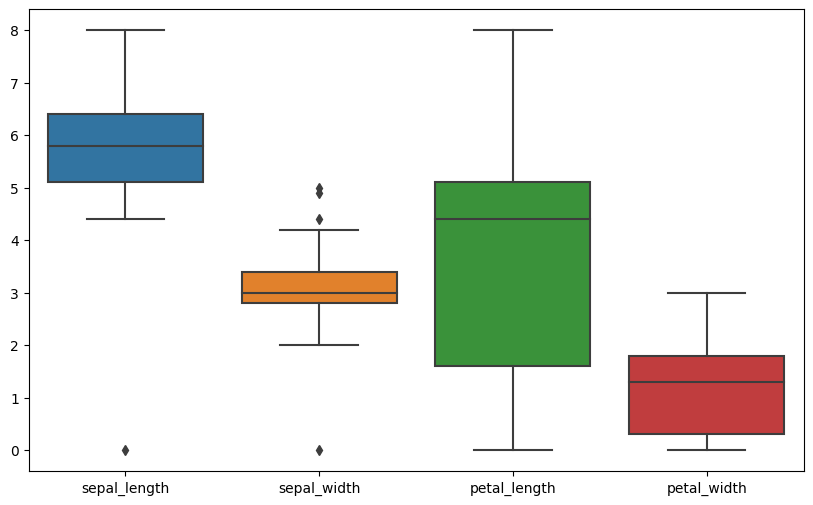

In [92]:
data.loc[data['petal_length'].isnull(),'petal_length']= 0
data.loc[data['petal_width'].isnull(),'petal_width']= 0
data.loc[data['sepal_length'].isnull(),'sepal_length']= 0
data.loc[data['sepal_width'].isnull(),'sepal_width']= 0

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
print('podemos observar una mayor dispersionen el largo de los petalos, que el ancho del sepalo tiene datos anomalos\n y que el ancho del petalo es la caracteristicca mas chica y el largo del sepalo es la caracteristica mas grande')
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [93]:
mask_plength_sup =  data['petal_length']<=7
mask_plength_inf =  data['petal_length']>=1
mask_pwitdth_inf =  data['petal_width']>=0.1
mask_pwitdth_sup =  data['petal_width']<=2.5

mask_slength_sup =  data['sepal_length']<=7
mask_slength_inf =  data['sepal_length']>=4
mask_switdth_inf =  data['sepal_width']>=2
mask_switdth_sup =  data['sepal_width']<=4.5

data['label'] = mask_plength_sup & mask_plength_inf & mask_pwitdth_inf & mask_pwitdth_sup   & mask_slength_sup & mask_slength_inf & mask_switdth_inf & mask_switdth_sup
data['label'] = data['label'].replace(True, '')
data['label'] = data['label'].replace(False, 'out of range')
print('Se observa que se tiene que 21 datos fuera de rango')
data['label'].value_counts()

Se observa que se tiene que 21 datos fuera de rango


                129
out of range     21
Name: label, dtype: int64

4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

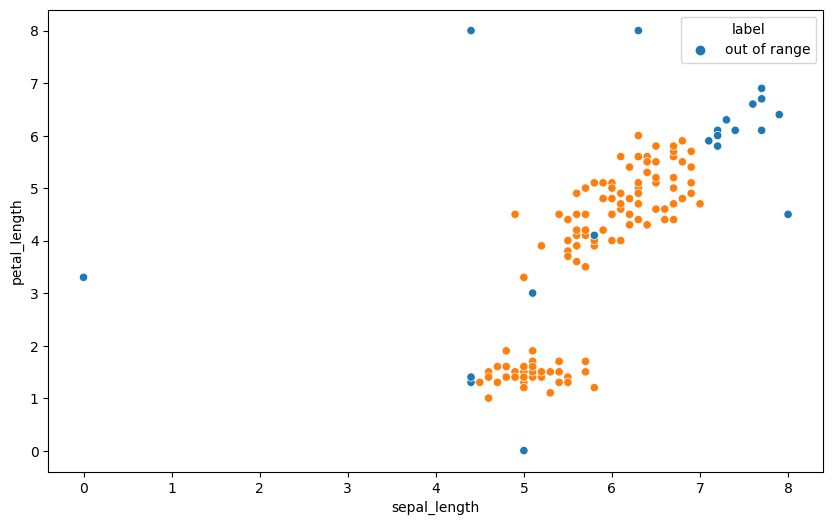

In [69]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='label',
    data=data,
)
plt.show()

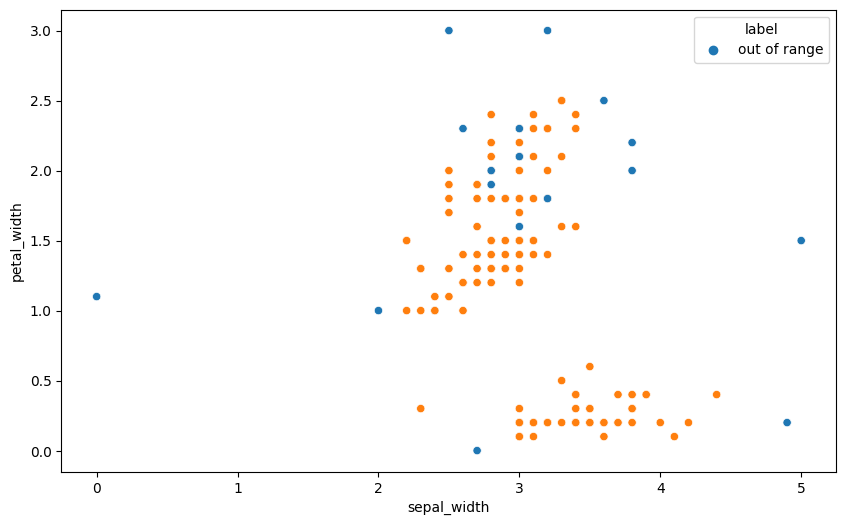

In [71]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='sepal_width',
    y='petal_width',
    hue='label',
    data=data,
)
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

Se pueden observar areas claramente definidas para cada especie


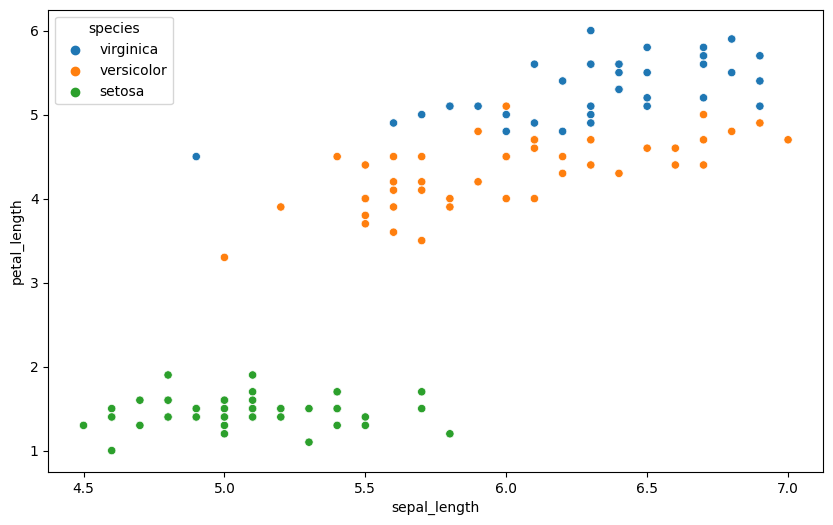

In [94]:
data_n = data.copy()[mask_plength_sup & mask_plength_inf & mask_pwitdth_inf & mask_pwitdth_sup   & mask_slength_sup & mask_slength_inf & mask_switdth_inf & mask_switdth_sup ]
mask = (data_n['species']!='default')
data_n = data_n[mask]

plt.figure(figsize=(10,6))
sns.scatterplot(data= data_n, x='sepal_length', y='petal_length', hue= 'species')
print('Se pueden observar areas claramente definidas para cada especie')
plt.show ()